# **MINI PROJECT**

---
# **Table of Contents**
---

1. [**Problem Statement**](#Section1)<br>
2. [**Hypothesis Generation**](#Section2)<br>
3. [**Loading Packages and Data**](#Section3)<br>
4. [**Data Structure and Content**](#Section4)<br>
5. [**Exploratory Data Analysis**](#Section5)<br>
6. [**Univariate Analysis**](#Section6)<br>
7. [**Bivariate Analysis**](#Section7)<br>
8. [**Missing Value Treatment**](#Section8)<br>
9. [**Feature Engineering**](#Section9)</br>
10. [**Encoding Categorical Variables**](#Section10)</br>
11. [**Label Encoding**](#Section11)</br>
12. [**One Hot Encoding**](#Section12)</br>
13.[**PreProcessing Data**](#Section13)</br>
14.[**Modeling**](#Section14)</br>
15.[**Linear Regression**](#Section15)</br>
16.[**Regularized Linear Regression**](#Section16)</br>
17.[**RandomForest**](#Section17)</br>
18.[**XGBoost**](#Section18)</br>
19.[**Summary**](#Section11)</br>

---
<a name = Section2></a>
# **1. Problem Statement**
---

* The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.Also, certain attributes of each product and store have been defined.
* The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
* Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
* The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.


---
<a name = Section2></a>
# **2.Hypothesis Generation**
---

**Store Level Hypotheses**:

**City type**: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.

**Population Density**: Stores located in densely populated areas should have higher sales because of more demand.

**Store Capacity**: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place

**Competitors**: Stores having similar establishments nearby should have less sales because of more competition.

**Marketing**: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.

**Location**: Stores located within popular marketplaces should have higher sales because of better access to customers.

**Customer Behavior**: Stores keeping the right set of products to meet the local needs of customers will have higher sales.

**Ambiance**: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

**Product Level Hypotheses**:

**Brand**: Branded products should have higher sales because of higher trust in the customer.

**Packaging**: Products with good packaging can attract customers and sell more.

**Utility**: Daily use products should have a higher tendency to sell as compared to the specific use products.

**Display Area**: Products which are given bigger shelves in the store are likely to catch attention first and sell more.

**Visibility in Store**: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.

**Advertising**: Better advertising of products in the store will should higher sales in most cases.

**Promotional Offers**: Products accompanied with attractive offers and discounts will sell more.


---
<a name = Section2></a>
# **3.Loading Packages and Data**
---


In [1]:
import pandas as pd
import numpy as np
import warnings
# Warnings will appear only once
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
import zipfile
with zipfile.ZipFile('/content/Bigmart.zip', 'r') as file:
    file.extractall()

**LOAD DATA**

In [3]:
 train = pd.read_csv('/content/train_v9rqX0R.csv')
 test= pd.read_csv('/content/test_AbJTz2l.csv')

---
<a name = Section2></a>
# **4.Data Structure and Content**
---

**DATA EXPLORATION**

**Train Dataset**

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


* 8523 entries in the dataset
* Item_Weight and Outlet_Size  have Missing  Values


In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
train.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

**Test Dataset**

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


* 5681 entries in test dataset
* Item_Weight	and Outlet_Size have missing values

In [10]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [11]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [12]:
test.skew()

Item_Weight                  0.129975
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

In [13]:
train = pd.read_csv("/content/train_v9rqX0R.csv")
test = pd.read_csv("/content/test_AbJTz2l.csv")
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.head())
print(test.head())
print(train.shape, test.shape, data.shape)

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [14]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

---
<a name = Section2></a>
# **5.Exploratory Data Analysis**
---

---
<a name = Section2></a>
# **6.Univariate Analysis**
---

In [15]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Axes: >

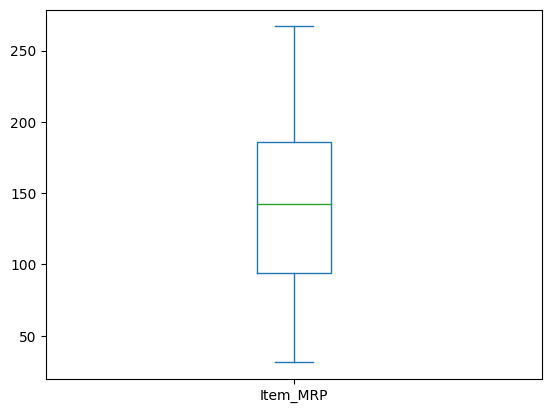

In [16]:
data['Item_MRP'].plot.box()

<Axes: xlabel='Item_Visibility', ylabel='Density'>

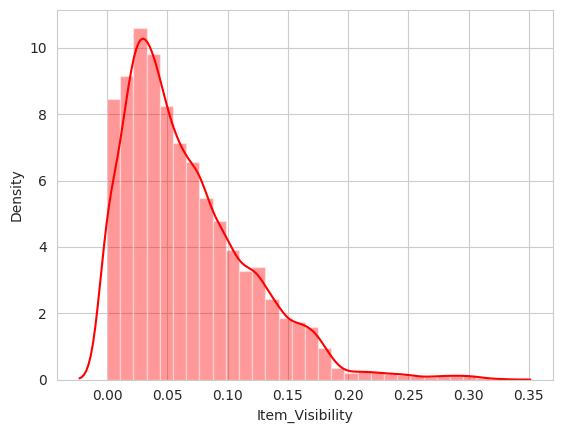

In [17]:
sns.set_style('whitegrid')
sns.distplot(data['Item_Visibility'], kde = True, color ='red', bins = 30)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

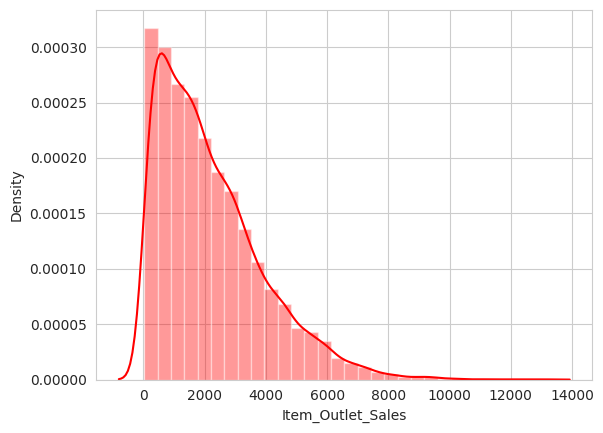

In [18]:
sns.set_style('whitegrid')
sns.distplot(data['Item_Outlet_Sales'], kde = True, color ='red', bins = 30)

<Axes: xlabel='Item_Weight', ylabel='Density'>

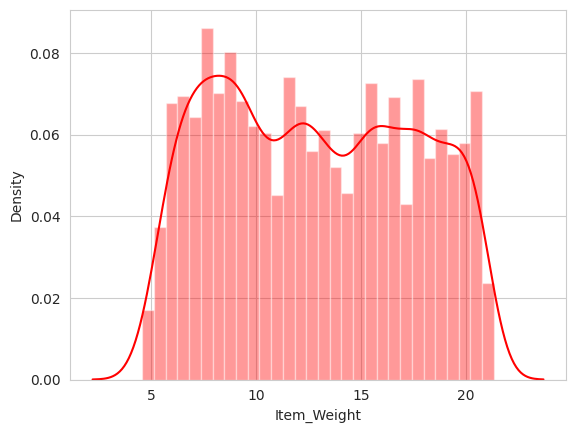

In [19]:
sns.set_style('whitegrid')
sns.distplot(train['Item_Weight'], kde = True, color ='red', bins = 30)

<Axes: xlabel='Item_MRP', ylabel='Density'>

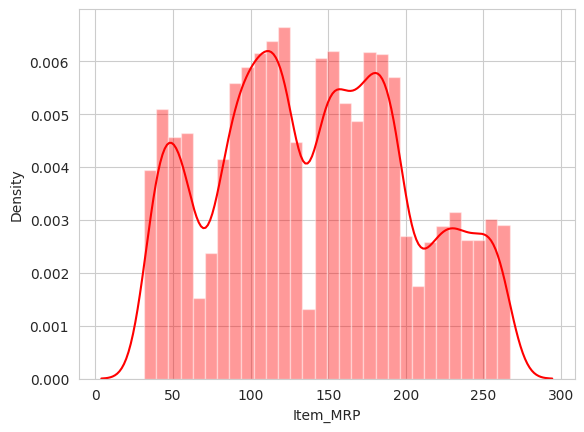

In [20]:
sns.set_style('whitegrid')
sns.distplot(data['Item_MRP'], kde = True, color ='red', bins = 30)

<Axes: >

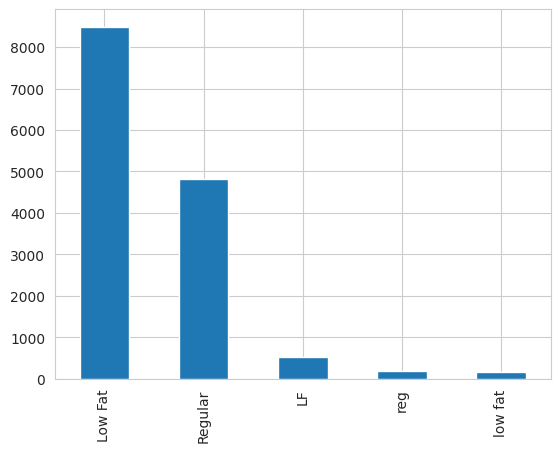

In [21]:
data['Item_Fat_Content'].value_counts().plot(kind='bar')

* Identify inconsistency in data (i.e) Low Fat,LF,low fat ,Regular and reg

<Axes: >

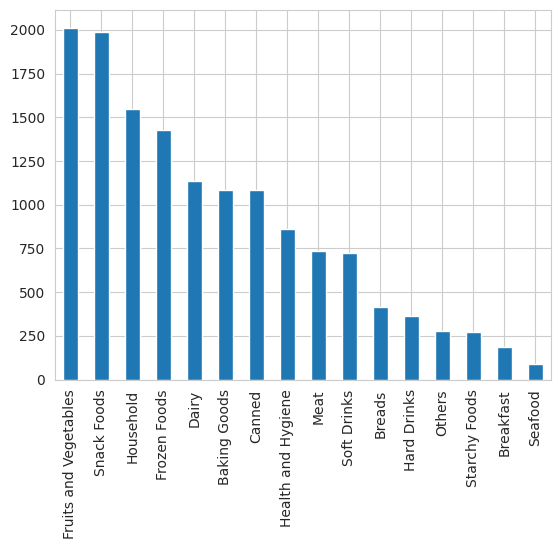

In [22]:
data['Item_Type'].value_counts().plot(kind='bar')

In [23]:
data['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

**Handling inconsistency of data**

In [24]:
data['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
data['Item_Fat_Content'].replace('reg','Regular',inplace=True)
data['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)

In [25]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

**Handling Missing Values**

In [26]:
data['Item_Weight'].fillna(data['Item_Weight'].median(), inplace = True)

In [27]:
data['Outlet_Size'].fillna('Medium', inplace = True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [29]:
data['YOB'] = 2023 - data['Outlet_Establishment_Year']

In [30]:
data['YOB']

0        24
1        14
2        24
3        25
4        36
         ..
14199    26
14200    14
14201    21
14202    16
14203    21
Name: YOB, Length: 14204, dtype: int64

In [31]:
data['Outlet_Establishment_Year']

0        1999
1        2009
2        1999
3        1998
4        1987
         ... 
14199    1997
14200    2009
14201    2002
14202    2007
14203    2002
Name: Outlet_Establishment_Year, Length: 14204, dtype: int64

**Item Type Combined**

In [32]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

**Modified Item_Visibility**

In [33]:
data['Item_Visibility'].replace(0.0,value=np.nan,inplace=True)  # first replace 0 with nan values

In [34]:
# fill nan values with corresponding item identifier mean value
data['Item_Visibility']=data['Item_Visibility'].fillna(data.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

In [35]:
data['Item_Visibility'].describe()

count    14204.000000
mean         0.070458
std          0.050086
min          0.003575
25%          0.031381
50%          0.058064
75%          0.098042
max          0.328391
Name: Item_Visibility, dtype: float64

In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,14204.0,12.759739,4.234851,4.555000,9.300000,12.600000,16.000000,21.350000
Item_Visibility,14204.0,0.070458,0.050086,0.003575,0.031381,0.058064,0.098042,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290000,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800
YOB,14204.0,25.169319,8.371664,14.000000,19.000000,24.000000,36.000000,38.000000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
 13  YOB                        14204 non-null  int

---
<a name = Section2></a>
# **7.Bivariate Analysis**
---

In [38]:

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,YOB,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,24,Food
3,FDX07,19.20,Regular,0.022930,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,25,Food
4,NCD19,8.93,Low Fat,0.014670,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,36,Non-Consumable


<Axes: >

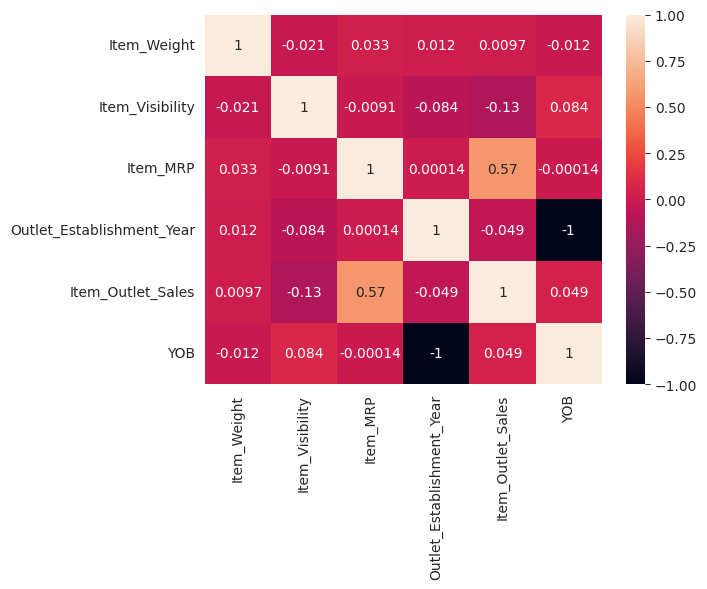

In [39]:
sns.heatmap(data.corr(), annot = True)

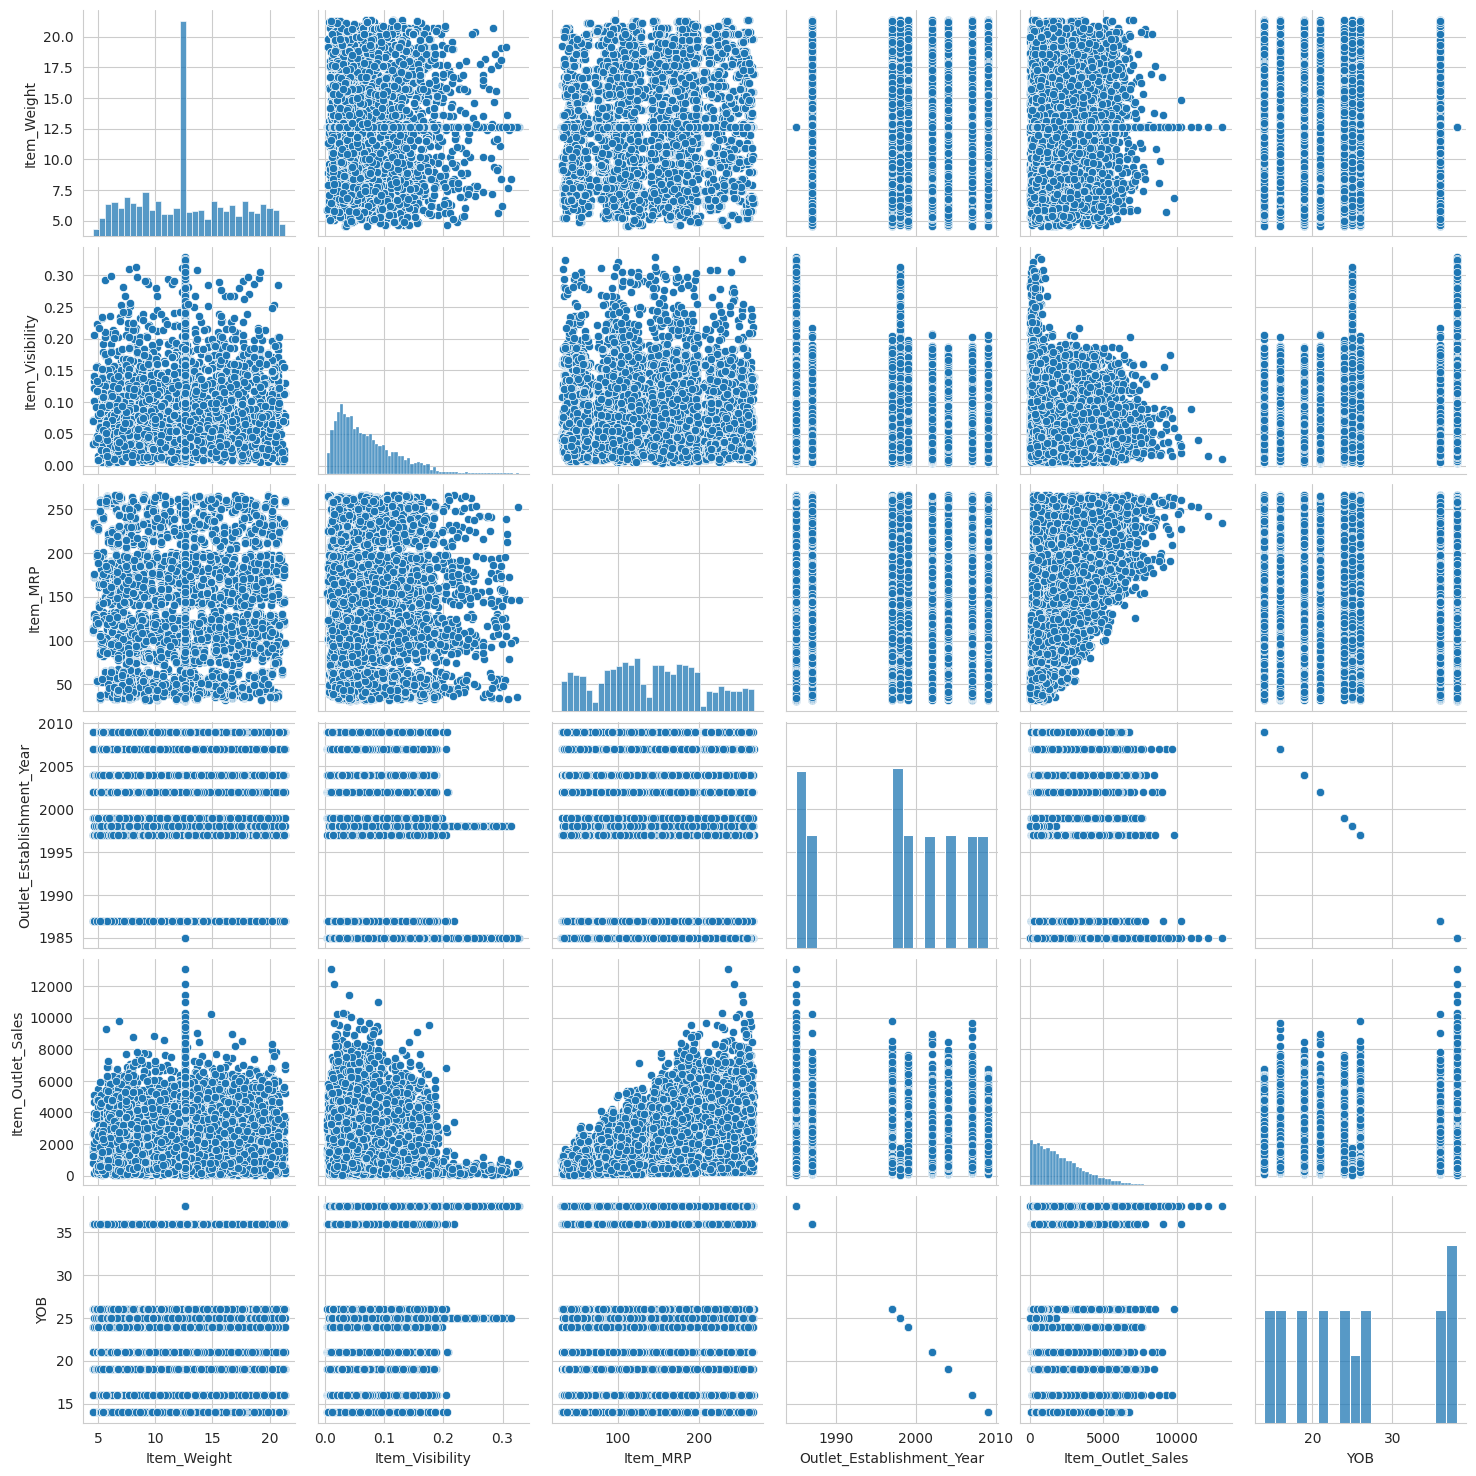

In [40]:
sns.pairplot(data)

---
<a name = Section2></a>
# **Feature Engineering**
---

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
 13  YOB                        14204 non-null  int

**Label Encoder**

In [42]:
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

**OneHotEncoding**

In [43]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [44]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
YOB                            int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

In [45]:
data[['Item_Fat_Content_0','Item_Fat_Content_1' ]].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,0,1
6,0,1
7,1,0
8,0,1
9,0,1


**Exporting Data**

In [46]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [47]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [48]:
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [49]:
#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

**Model Building**

In [50]:
train = pd.read_csv("/content/train_modified.csv")
test = pd.read_csv("/content/test_modified.csv")

In [51]:

#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
  alg.fit(dtrain[predictors], dtrain[target])
  #Predict training set:
  dtrain_predictions = alg.predict(dtrain[predictors])

  #Perform cross-validation:
  cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20)
  cv_score = np.sqrt(np.abs(cv_score))

  #Print model report:
  print("\nModel Report")
  print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
  print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

  #Predict on testing data:
  dtest[target] = alg.predict(dtest[predictors])

  #Export submission file:
  IDcol.append(target)
  submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
  submission.to_csv(filename, index=False)


Model Report
RMSE : 1127
CV Score : Mean - 0.7475 | Std - 0.0194 | Min - 0.6983 | Max - 0.7848


<Axes: title={'center': 'Model Coefficients'}>

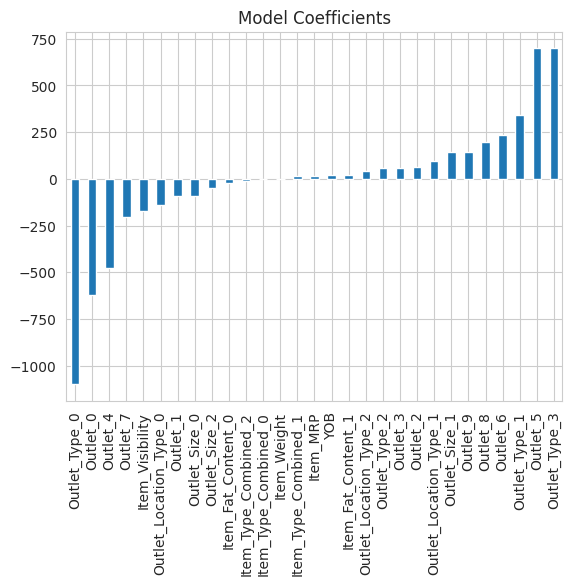

In [52]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression()
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

**Random Forest Model**


Model Report
RMSE : 1073
CV Score : Mean - 0.7699 | Std - 0.02202 | Min - 0.7219 | Max - 0.8053


<Axes: title={'center': 'Feature Importances'}>

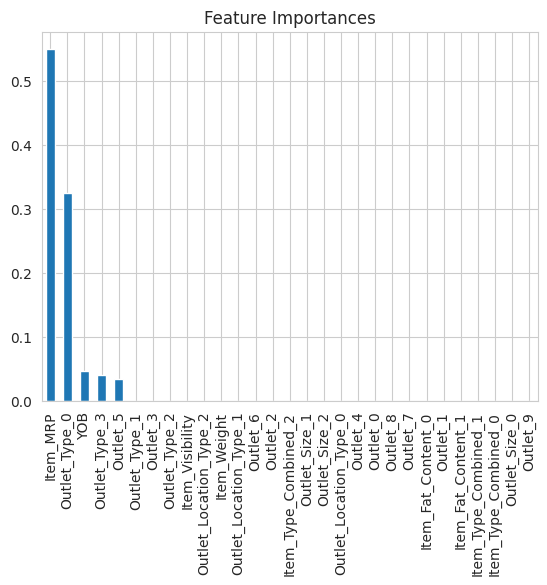

In [53]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.feature_importances_, predictors).sort_values(ascending=False)
coef2.plot(kind='bar', title='Feature Importances')